# INTERNSHIP - Data Analysis ( LEVEL - 2 )

In [45]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.offline as pyo
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("Dataset .csv")

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Task - 1
### Restaurant Ratings

In [12]:
# Analyze the distribution of aggregate ratings and determine the most common rating range
df["Aggregate rating"].describe

<bound method NDFrame.describe of 0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64>

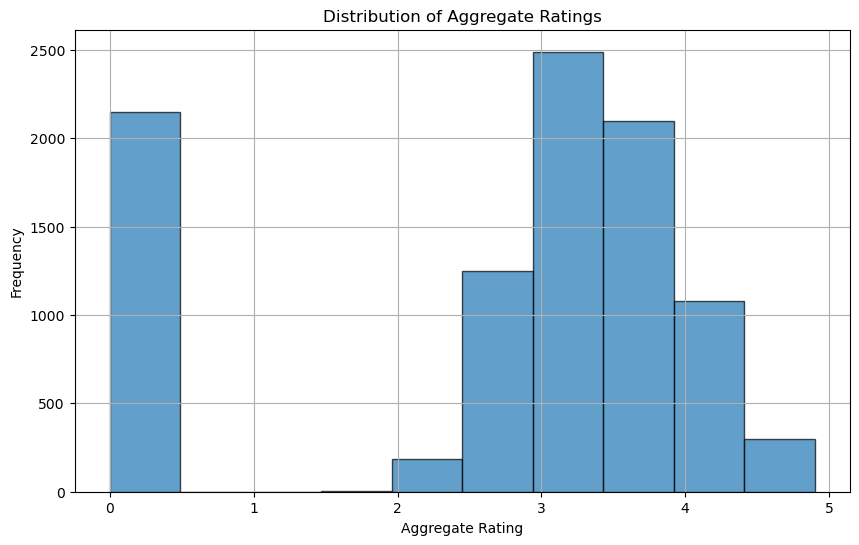

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df['Aggregate rating'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Aggregate Ratings')
plt.grid(True)
plt.show()

In [7]:
rating_counts = df['Aggregate rating'].value_counts().sort_index()
most_common_range = rating_counts.idxmax()

In [8]:
most_common_range

0.0

In [13]:
# Calculate the average number of votes received by restaurants
df["Votes"].mean()

156.909747670401

## Task - 2
### Cuisines combination

In [14]:
# Identify the most common combinations of cuisines in the dataset
df['Cuisines'] = df['Cuisines'].str.split(', ')
exploded_cuisines = df.explode('Cuisines')

In [17]:
exploded_cuisines

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,French,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,Desserts,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,Seafood,...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,Cafe,...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,Italian,...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,World Cuisine,...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [15]:
cuisine_counts = exploded_cuisines['Cuisines'].value_counts()

In [19]:
cuisine_counts

Cuisines
North Indian      3960
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Fish and Chips       1
Malwani              1
Cuisine Varies       1
Soul Food            1
B�_rek               1
Name: count, Length: 145, dtype: int64

In [22]:
# Determine if certain cuisine combinations tend to have higher ratings
df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
df['Cuisines'] = df['Cuisines'].apply(lambda x: ', '.join(sorted(x)))
average_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

In [25]:
average_ratings

Cuisines
    2.66637
Name: Aggregate rating, dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Task - 3
### Geographic Analysis

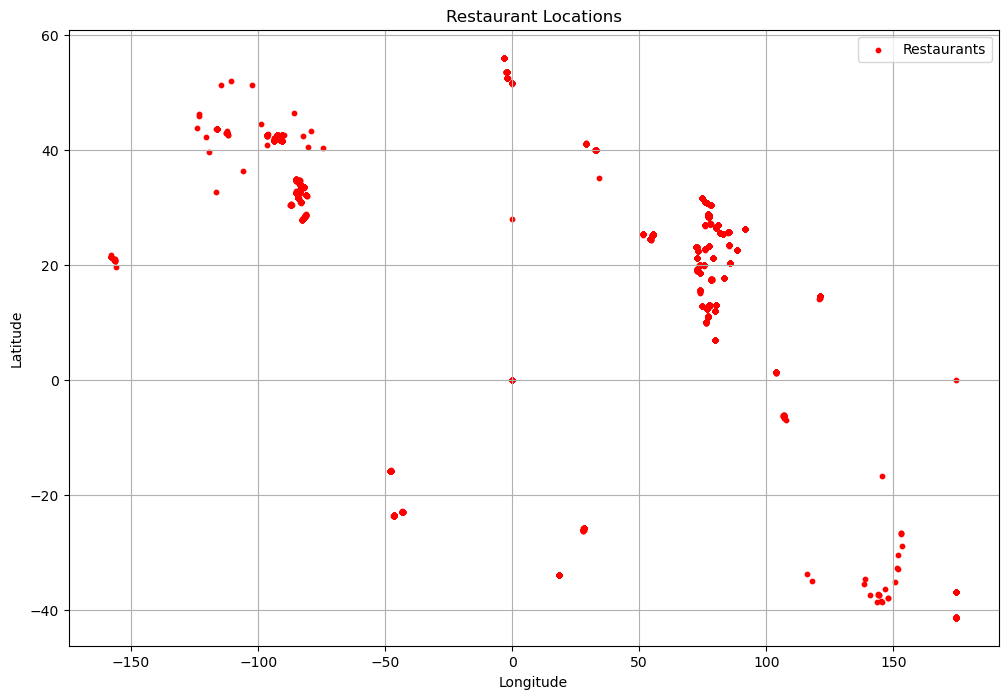

In [46]:
# Plot the locations of restaurants using longitude and latitude coordinates
plt.figure(figsize=(12, 8))
lat_min, lat_max = df['Latitude'].min() - 0.1, df['Latitude'].max() + 0.1
lon_min, lon_max = df['Longitude'].min() - 0.1, df['Longitude'].max() + 0.1
plt.scatter(df['Longitude'], df['Latitude'], color='red', s=10, label='Restaurants')
plt.title('Restaurant Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\Jatin Sisodia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



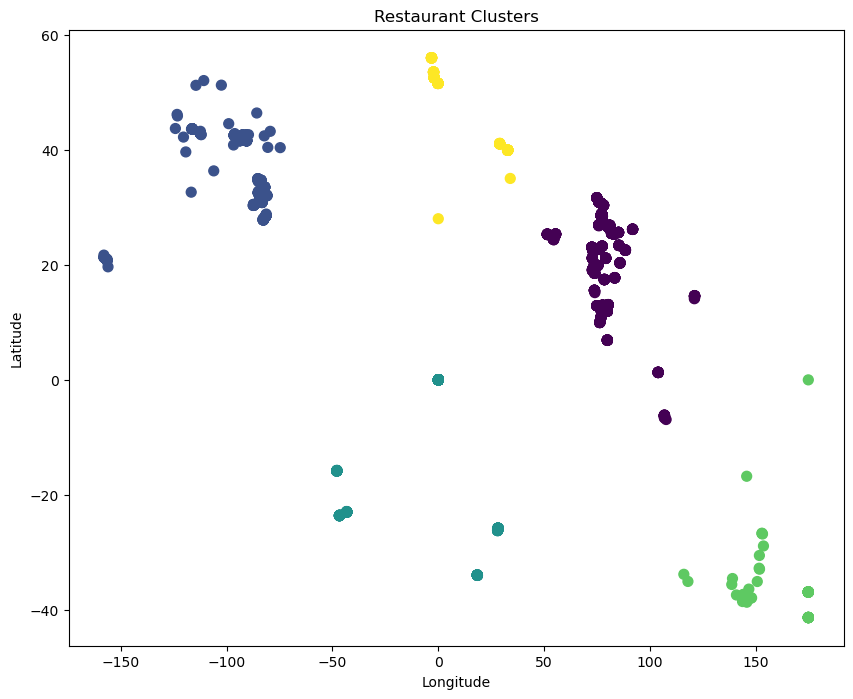

In [43]:
# Identify any patterns or clusters of restaurants in specific areas.
X = df[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Restaurant Clusters')
plt.show()

## Task - 4
### Restaurant Chains

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [65]:
# Identify if there are any restaurant chains present in the dataset
chain_restaurants = df['Restaurant Name'].value_counts().head()

In [66]:
chain_restaurants 

Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Name: count, dtype: int64

In [56]:
# Analyze the ratings and popularity of different restaurant chains
chain_counts = df['Restaurant Name'].value_counts()
chains = chain_counts[chain_counts > 1].index

In [63]:
chain_ratings = []
for chain in chains:
    chain_df = df[df['Restaurant Name'] == chain]
    total_votes = chain_df['Votes'].sum()
    if total_votes > 0:
        aggregate_rating = (chain_df['Aggregate rating'] * chain_df['Votes']).sum() / total_votes
    else:
        aggregate_rating = 0
    chain_ratings.append({
        'Chain': chain,
        'Total Votes': total_votes,
        'Aggregate Rating': aggregate_rating
    })

In [60]:
chain_ratings_df = pd.DataFrame(chain_ratings)

In [61]:
chain_ratings_df = chain_ratings_df.sort_values(by='Aggregate Rating', ascending=False)

In [64]:
chain_ratings_df 

,Chain,Total Votes,Aggregate Rating
182,Talaga Sampireun,5514,4.900000
587,Silantro Fil-Mex,1364,4.878446
277,Naturals Ice Cream,3094,4.869360
553,The Cafe,590,4.862712
323,AB's Absolute Barbecues,3151,4.820343
...,...,...,...
375,Delhi Chaat Bhandar,1,0.000000
437,Chinese Hot,1,0.000000
669,Essen Foods,1,0.000000
388,Garam Masala,0,0.000000


# END OF LEVEL - 2